In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.python.framework import ops
ops.reset_default_graph()
#encoding
#0,1,2
#[S,E,P.......]
char_arr = [c for c in 'SEPabcdefghijklmnopqrstuvwxyz단어나무놀이소녀연습사랑'] 
#                       0,1,2
#범주형 데이터
num_dic={n: i for i, n in enumerate(char_arr)}
dic_len=len(num_dic)
print(dic_len) #41
seq_data=[['word','단어'],['wood','나무'],
          ['game','놀이'],['girl','소녀'],
          ['test','연습'],['love','사랑']]

def make_batch(seq_data):
    input_batch=[]
    output_batch=[]
    target_batch=[]
    for seq in seq_data: #처음 ['word','단어'] 
          input=[num_dic[n] for n in seq[0]] #'word'  =>번호 w: 25, o :20 ,r :17...
          #첫번째 입력되는 데이터는 'word' 를 학습해서 넘어온 smoking gun 
          output=[num_dic[n] for n in ('S' +seq[1])] #훈련된 특징값,'S' 시작점 
          target=[num_dic[n] for n in (seq[1]+'E')] #끝을 확인 하기 위해서 '연습이다'-> '단어EE'
          #identity matrix 단위행렬=>one hot encoding
          #1000000000
          #0100000000
          # ........
          input_batch.append(np.eye(dic_len)[input]) #번호로 만든것 예)25가 들어가면 2차원 배열로 4 x 42 
          output_batch.append(np.eye(dic_len)[output])
          target_batch.append(target)                #2x 41
    return input_batch,output_batch,target_batch
learning_rate=0.01
n_hidden=128   #neurons 출력이 128차
total_epoch=100
n_class=n_input=dic_len #41
#encoder,decoder  용 데이터 주입변수
enc_input=tf.placeholder(tf.float32,[None,None,n_input])
dec_input=tf.placeholder(tf.float32,[None,None,n_input])
targets=tf.placeholder(tf.int64,[None,None])

with tf.variable_scope('encode'): #input4개 
    #셀 자체는 FFNN 한 개 , 입력->가중치->>출력(n_hidden)
    enc_cell=tf.nn.rnn_cell.BasicRNNCell(n_hidden) #입력 41 x 128
    #과적합방지하기 위해 계산회로 생략-random 하게 생략
    enc_cell=tf.nn.rnn_cell.DropoutWrapper(enc_cell,output_keep_prob=0.5,seed=100) 
    #셀이 4개 셀당 41개의 데이터가 입력
    outputs,enc_states=tf.nn.dynamic_rnn(enc_cell,enc_input,dtype=tf.float32)
with tf.variable_scope('decode'): #outputs 3개 
    dec_cell=tf.nn.rnn_cell.BasicRNNCell(n_hidden)
    dec_cell=tf.nn.rnn_cell.DropoutWrapper(dec_cell,output_keep_prob=0.5,seed=100)
   #2 x 41??
    #앞의 인코더 망에서 출력된 states값:마지막 cell 의 출력값
    #앞의 데이터를 다 고려한 특징 
    #두개의 망을 연결 initial_state=enc_states
    outputs,enc_states=tf.nn.dynamic_rnn(dec_cell,dec_input,initial_state=enc_states,dtype=tf.float32)


41


In [12]:
#전체 데이터가 6개, (output)3개!!가 128개로 나온다 :'S'+'단어'=3개
#(6x3x128 ) x 41 행렬 곱하면 
#6x3x41

model=tf.layers.dense(outputs,n_class,activation=None)
cost=tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model,labels=targets))
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [14]:
input_batch,output_batch,target_batch=make_batch(seq_data)
for epoch in range(total_epoch): #100회
    _,loss=sess.run([optimizer,cost],feed_dict={enc_input:input_batch,
                                               dec_input:output_batch,
                                               targets:target_batch})
    print('epoch:','%04d' % (epoch + 1),'cost=','{:.6f}'.format(loss)) #epoch + 1 처음이 0부터 시작하기 때문에 

epoch: 0001 cost= 2.693845
epoch: 0002 cost= 1.847687
epoch: 0003 cost= 1.406774
epoch: 0004 cost= 0.630577
epoch: 0005 cost= 0.404428
epoch: 0006 cost= 0.364389
epoch: 0007 cost= 0.223047
epoch: 0008 cost= 0.100556
epoch: 0009 cost= 0.095548
epoch: 0010 cost= 0.082468
epoch: 0011 cost= 0.046243
epoch: 0012 cost= 0.065438
epoch: 0013 cost= 0.020039
epoch: 0014 cost= 0.023188
epoch: 0015 cost= 0.015581
epoch: 0016 cost= 0.016316
epoch: 0017 cost= 0.023700
epoch: 0018 cost= 0.014285
epoch: 0019 cost= 0.006344
epoch: 0020 cost= 0.013925
epoch: 0021 cost= 0.010044
epoch: 0022 cost= 0.004519
epoch: 0023 cost= 0.006793
epoch: 0024 cost= 0.008879
epoch: 0025 cost= 0.000822
epoch: 0026 cost= 0.002353
epoch: 0027 cost= 0.005951
epoch: 0028 cost= 0.002346
epoch: 0029 cost= 0.001693
epoch: 0030 cost= 0.002250
epoch: 0031 cost= 0.002017
epoch: 0032 cost= 0.014444
epoch: 0033 cost= 0.015728
epoch: 0034 cost= 0.001820
epoch: 0035 cost= 0.001198
epoch: 0036 cost= 0.001243
epoch: 0037 cost= 0.001254
e

In [ ]:
#######################

In [16]:
def translate(word): #translate =함수
    #모델의 자리수는 일치시켜야 함 그래서 PPPP
    seq_data=[word,'P' * len(word)] #word, PPPP
    #1x4x41
    #1x4x41 (원핫인코딩)
    input_batch,output_batch,target_batch=make_batch([seq_data])
    
    #1x5x41 : (PPPP+E =5)
    prediction=tf.argmax(model,2) #면, 행, 렬 중 열을 중심으로 (41개중 max)
    result=sess.run(prediction,feed_dict={enc_input: input_batch,
                                         dec_input:output_batch,
                                         targets:target_batch})
    decoded=[char_arr[i] for i in result[0]] #5 x 41
    end=decoded.index('E')
    translated=''.join(decoded[:end])
    
    return translated
print('word->',translate('word'))

word-> 단어


In [ ]:
#OCR: kakao API
#카카오 

In [21]:
import json
import cv2 #computer vision 이미지, 동영상처리
import requests #html 페이지를 요청
import sys
LIMIT_PX=1024
LIMIT_BYTE=1024*1024
LIMIT_BOX=40

#ocr 절차
#이미지사이즈 조정->글씨를 둘러싼 box를 detection (컬러를 찾아서 박스로 잘라냄)

In [23]:

def kaka0_ocr_resize(image_path:str): #규격이미지 사이즈
    image=cv2.imread('2.jpg') #자기의 이미지로 변경:영수증
    height,width,_=image.shape
    if LIMIT_PX < height or LIMIT_PX < width:
        ratio=float(LIMIT_PX) / max(height,width)
        image=cv2.resize(image,None,fx=ratio,fy=ratio)
        height,width,_=height,width,_=image.shape
        image_path='{}_resized.jpg'.format('2')
        cv2.imwrite(image_path,image)
        return image_path
    return None

In [ ]:
#카카오에서 준 아이디를 기입
인코딩할때 jpg 로 

In [24]:
#사용법
#open api 함수를 원격호출(remote call)->네트워크를 통해서 requests 호출(시간이 걸림: 비동기방식
#비동기방식:호출시키고 돌아올때까지 다른 작업을 하고 있음- event를 받아서 
#대표적인 비동기 통신방식: AJAX :웹브라우저 내부적 처리

def kakao_ocr_detect(image_path:str,appkey:str):
    API_URL='https://kapi.kakao.com/v1/vision/text/detect'
    headers={'authorization':'KakaoAK{}'.format('자신의 API_ID')}
    #naver=>jpg 혁식만, gif(애니메이션), png(transparent 지원)
    image=cv2.imread('2.jpg') #cv2 통해서 이미지를 로드할때
    jpeg_image=cv2.imecode('.jpg',image)[1]
    data=jpeg_image.tobytes() #네크워크 전송->serialization
    
    #네트워크일때->데이터가시리얼로 가야함(네크워크모델)
    #8개 line 으로 구성=>4개 회선만 사용->1개 전송 ,1개는 수신
    #flask에서 사용
    #인서텟에서 표준 데이터 포멧:json 
    return requests.post(API_URL,headers=headers,files={'file':data},data={'boxes':json.dumps(boxes)})

In [25]:
#자동 가계부
def main():
    image_path,appkey=sys.argv[0],sys.argv[0]
    resize_impath=kakao_ocr_resize(image_path)
    output=kakao_ocr_detect(image_path,appkey).json()
    boxes=output['result']['boxes']
    boxes=boxes[:min(len(boxes),LIMIT_BOX)]
    output=kakao_ocr_recognize(image_path,boxes,appkey).json()
output=main()
output['result']

NameError: name 'kakao_ocr_resize' is not defined

In [ ]:
import json

import cv2
import requests
import sys

LIMIT_PX = 1024
LIMIT_BYTE = 1024*1024  # 1MB
LIMIT_BOX = 40


def kakao_ocr_resize(image_path: str):
    """
    ocr detect/recognize api helper
    ocr api의 제약사항이 넘어서는 이미지는 요청 이전에 전처리가 필요.

    pixel 제약사항 초과: resize
    용량 제약사항 초과  : 다른 포맷으로 압축, 이미지 분할 등의 처리 필요. (예제에서 제공하지 않음)

    :param image_path: 이미지파일 경로
    :return:
    """
    image = cv2.imread(image_path)
    height, width, _ = image.shape

    if LIMIT_PX < height or LIMIT_PX < width:
        ratio = float(LIMIT_PX) / max(height, width)
        image = cv2.resize(image, None, fx=ratio, fy=ratio)
        height, width, _ = height, width, _ = image.shape

        # api 사용전에 이미지가 resize된 경우, recognize시 resize된 결과를 사용해야함.
        image_path = "{}_resized.jpg".format(image_path)
        cv2.imwrite(image_path, image)

        return image_path
    return None


def kakao_ocr_detect(image_path: str, appkey: str):
    """
    detect api request example
    :param image_path: 이미지파일 경로
    :param appkey: 카카오 앱 REST API 키
    """
    API_URL = 'https://kapi.kakao.com/v1/vision/text/detect'

    headers = {'Authorization': 'KakaoAK {}'.format(appkey)}

    image = cv2.imread(image_path)
    jpeg_image = cv2.imencode(".jpg", image)[1]
    data = jpeg_image.tobytes()

    return requests.post(API_URL, headers=headers, files={"file": data})


def kakao_ocr_recognize(image_path: str, boxes: list, appkey: str):
    """
    recognize api request example
    :param boxes: 감지된 영역 리스트. Canvas 좌표계: 좌상단이 (0,0) / 우상단이 (limit,0)
                    감지된 영역중 좌상단 점을 기준으로 시계방향 순서, 좌상->우상->우하->좌하
                    ex) [[[0,0],[1,0],[1,1],[0,1]], [[1,1],[2,1],[2,2],[1,2]], ...]
    :param image_path: 이미지 파일 경로
    :param appkey: 카카오 앱 REST API 키
    """
    API_URL = 'https://kapi.kakao.com/v1/vision/text/recognize'

    headers = {'Authorization': 'KakaoAK {}'.format(appkey)}

    image = cv2.imread(image_path)
    jpeg_image = cv2.imencode(".jpg", image)[1]
    data = jpeg_image.tobytes()

    return requests.post(API_URL, headers=headers, files={"file": data}, data={"boxes": json.dumps(boxes)})


def main():
    if len(sys.argv) != 3:
        print("Please run with args: $ python example.py /path/to/image appkey")
    #image_path, appkey = sys.argv[1], sys.argv[2]
    image_path, appkey = "2.jpg","0166edbccc8fae3043dc6f0830749d81"

    resize_impath = kakao_ocr_resize(image_path)
    if resize_impath is not None:
        image_path = resize_impath
        print("원본 대신 리사이즈된 이미지를 사용합니다.")

    output = kakao_ocr_detect(image_path, appkey).json()
    print("[detect] output:\n{}\n".format(output))

    boxes = output["result"]["boxes"]
    boxes = boxes[:min(len(boxes), LIMIT_BOX)]
    output = kakao_ocr_recognize(image_path, boxes, appkey).json()
    print("[recognize] output:\n{}\n".format(json.dumps(output, sort_keys=True, indent=2)))


if __name__ == "__main__":
    main()


In [5]:
import cv2
import numpy as np

history = 30

# cap = cv2.VideoCapture(0) : 0번 device로부터 카메라 영상을 받아들인다.
cap = cv2.VideoCapture("corrupted_video.mp4")

fgbg = cv2.createBackgroundSubtractorMOG2() # Background Filter
print(cap.isOpened())
# isOpened() == False : 파일이나 장치가 존재하지 않는다.
if(cap.isOpened() == False) :
    print("에러 발생")

while(cap.isOpened()):
    ret, frame = cap.read() # 1개의 frame => 동영상은 ntsc방식 29.7fps
    if ret == True:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        fgmask = fgbg.apply(gray, learningRate=1.0/history)
        cv2.imshow("Frame", fgmask) # 이미지 출력
        if cv2.waitKey(25) & 0xFF == ord("q"): # ord("q") : q에 대한 ascii코드값(=0xFF)
            break
    else:
        break
        
cap.release()
cv2.destroyAllWindows()

True


In [2]:
# 동영상 저장
import cv2
import numpy as np # computer vision 처리 -> 사운드 불가

cap = cv2.VideoCapture("corrupted_video.mp4")
fourcc = cv2.VideoWriter_fourcc(*"XVID") # codec
out = cv2.VideoWriter("output.avi", fourcc, 20.0, (640,480))

while(cap.isOpened()) :
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.flip(frame, 0)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        out.write(frame)
        cv2.imshow("frame", frame)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
#AE(autoencoder)

In [ ]:
#denoising autoender
원본,noise가 있는 학습데이터
학습은 noise가 있는 학습데이터=>가중치
autoencoder 는 denoising 한다.


In [21]:
# AE(AutoEncoder)
%matplotlib inline
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def vis(images, save_name):
    dim = images.shape[0]
    n_image_rows = int(np.ceil(np.sqrt(dim)))
    n_image_cols = int(np.ceil(dim * 1.0/n_image_rows))
    gs = gridspec.GridSpec(n_image_rows, n_image_cols, top=1., bottom=0., right=1., left=0., hspace=0., wspace=0.)
    for g, count in zip(gs, range(int(dim))):
        ax = plt.subplot(g)
        ax.imshow(images[count, :].reshape((28,28)))
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.savefig(save_name + "_vis.png")
    plt.show()
    
mnist_width = 28
n_visible = mnist_width * mnist_width
n_hidden = 500

In [22]:
corruption_level = 0.3

# n_visible=784
X = tf.placeholder("float", [None, n_visible], name="X")
mask = tf.placeholder("float", [None, n_visible], name="mask")
W_init_max = 4 * np.sqrt(6. / (n_visible + n_hidden))
# 균등분포에서 데이터를 생성(가중치 초기화)
W_init = tf.random_uniform(shape=[n_visible, n_hidden], minval=-W_init_max, maxval=W_init_max)
W = tf.Variable(W_init, name="W")
b = tf.Variable(tf.zeros([n_hidden]), name="b")

In [23]:
W_prime = tf.transpose(W) # 자기자신의 전치
b_prime = tf.Variable(tf.zeros([n_visible]), name="b_prime")
def model(X, mask, W, b, W_prime, b_prime):
    tilde_X = mask * X # 행렬 요소곱
    Y = tf.nn.sigmoid(tf.matmul(tilde_X, W) + b)
    Z = tf.nn.sigmoid(tf.matmul(Y, W_prime) + b_prime)
    return Z

Z = model(X, mask, W, b, W_prime, b_prime)
# 가중치에 이미지의 특성이 추출된다.

In [26]:
#X: 원본 데이터 ,Z:예측된 데이터( X=Z 자기자신 !!)
#비지도 학습:데이터의 특징: PCA 를 하는 이유=데이터 재해석 (직교하는 축으로)
#autuencoder :input :자기자신 ==output 도 자기자신
#noise :군데군데가 구멍남: 그런데도 원본의 특징을 추출 
cost=tf.reduce_sum(tf.pow(X-Z,2))
train_op=tf.train.GradientDescentOptimizer(0.02).minimize(cost)
predict_op=Z

mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)
trX,trY,teX,teY=mnist.train.images,mnist.train.labels,mnist.test.images,mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


0 114371.51
1 94462.555
2 85647.21
3 82823.04
4 78535.63
5 75084.84
6 74404.7
7 72545.3
8 69967.29
9 68138.805
10 67688.78
11 66809.84
12 66405.83
13 65713.734
14 65242.516
15 64172.566
16 63796.625
17 64826.094
18 63495.164
19 62375.34
20 62168.05
21 62766.11
22 61561.492
23 62482.188
24 61224.7
25 61129.945
26 60745.78
27 60511.17
28 61189.562
29 60765.5
30 59753.195
31 60412.945
32 60100.055
33 59695.07
34 59848.85
35 59524.39
36 60464.73
37 59260.492
38 59065.055
39 59111.43
40 60855.05
41 59951.402
42 59445.695
43 60180.035
44 59738.86
45 58914.09
46 58550.195
47 59232.086
48 58238.03
49 58824.926
50 58345.51
51 58430.773
52 58187.316
53 58073.945
54 57800.492
55 58941.15
56 57770.742
57 57693.016
58 57999.434
59 57499.625
60 57557.91
61 57773.125
62 57840.773
63 57458.29
64 57065.344
65 58184.86
66 57078.094
67 58077.04
68 57870.1
69 57569.637
70 57631.816
71 56929.82
72 56933.035
73 57680.613
74 57512.984
75 57458.176
76 56810.375
77 56882.28
78 57518.156
79 57354.277
80 57464.4

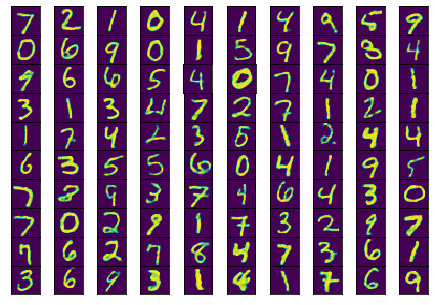

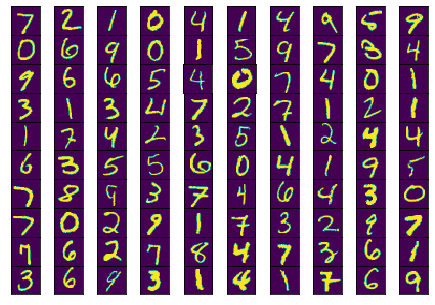

In [28]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(100):
        for start,end in zip(range(0,len(trX),128),
                            range(128,len(trX)+1,128)):
            input_=trX[start:end]
            mask_np=np.random.binomial(1,1-corruption_level,input_.shape)
            
            #입력 데이터에 target 
            sess.run(train_op,feed_dict={X:input_,mask:mask_np})
        mask_np=np.random.binomial(1,1-corruption_level,teX.shape)
        print(i,sess.run(cost,feed_dict={X:teX,mask:mask_np}))
    #binomial :이항 분포로 마스크 생성 +노이즈(원본이미지 노이즈 )
    mask_np=np.random.binomial(1,1-corruption_level,teX[:100].shape)
    #예측할때 
    predicted_imgs=sess.run(predict_op,feed_dict={X:teX[:100],mask:mask_np})
    input_imgs=teX[:100]
vis(predicted_imgs,'pred') #예측된 이미지 (가중치를 곱했을때 나온)
vis(input_imgs,'in') #

In [ ]:
판별모델(discrimitive model)
Variational autoencoder (VAE) :변동인코더
genirative model 생성모델->확률, 평균+분산(분포)
잠재변수(latent variables):키,남자,=>특징+노이즈

In [38]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
from functools import partial
#train,test=tf.keras.datasets.mnist.load_data()
train_x,train_y=train
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('/tmp/data/')

n_inputs=28 * 28 #784
n_hidden1=500
n_hidden2=500
n_hidden3=20
n_hidden4=n_hidden2
n_hidden5=n_hidden1
n_outputs=n_inputs   #입력이 출력으로 
learning_rate=0.001
#without scaling 스케일링 없이 초기화 ??
initializer=tf.contrib.layers.variance_scaling_initializer()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [39]:
# partial 매개변수 일부를 고정
my_dense_layer=partial(tf.layers.dense,
                       activation=tf.nn.elu, #-1을 고려한 relu
                       kernel_initializer=initializer) 
X=tf.placeholder(tf.float32,[None,n_inputs])
hidden1=my_dense_layer(X,n_hidden1)
hidden2=my_dense_layer(hidden1,n_hidden2)
hidden3_mean=my_dense_layer(hidden2,n_hidden3,activation=None)
hidden3_sigma=my_dense_layer(hidden2,n_hidden3,activation=None)
noise=tf.random_normal(tf.shape(hidden3_sigma),dtype=tf.float32)

#평균+ 분산 * 노이즈 (변동된 특성을 뽑아냄)
#요소곱:
hidden3=hidden3_mean+hidden3_sigma * noise  #변동특성

hidden4=my_dense_layer(hidden3,n_hidden4)
hidden5=my_dense_layer(hidden4,n_hidden5)

#hidden5 :자기자신값 28 * 28 =784
logits=my_dense_layer(hidden5,n_outputs,activation=None) 
outputs=tf.sigmoid(logits)


In [40]:
xentropy=tf.nn.sigmoid_cross_entropy_with_logits(labels=X,logits=logits) #입력값==출력값

#재구축 손실
reconstruction_loss=tf.reduce_sum(xentropy)

#epsilon 상수:부동소수점을 비교 0.0001 :차가 0.0001 이하면 같은 것으로 본다.
eps=1e-10 #eps epsilon 상수 : 로그의 성질 :0이면 무한대

#cost function:
#지연손실(확률분포 곡선)
latent_loss=0.5 * tf.reduce_sum( #log liklihood 우도 확률
    tf.square(hidden3_sigma)+tf.square(hidden3_mean)
                               -1 -tf.log(eps+tf.square(hidden3_sigma)))  
loss=reconstruction_loss + latent_loss
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op=optimizer.minimize(loss)
init=tf.global_variables_initializer()

In [41]:
import sys
n_digits=60
n_epochs=50
batch_size=150
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        n_batches=mnist.train.num_examples // batch_size
        for iteration in range(n_batches):
            print('\r{}%'.format(100*iteration // n_batches),end='')
            sys.stdout.flush()
            X_batch,y_batch=mnist.train.next_batch(batch_size)
            sess.run(training_op,feed_dict={X:X_batch})
        loss_val,reconstruction_loss_val,latent_loss_val=sess.run([loss,reconstruction_loss,latent_loss],feed_dict={X:X_batch})
        print('\r{}'.format(epoch),'train total loss:',loss_val,'\tReconstruction loss:',reconstruction_loss_val,'\tLatent loss:',
             latent_loss_val)
    codings_rnd=np.random.normal(size=[n_digits,n_hidden3])
    outputs_val=outputs.eval(feed_dict={hidden3:codings_rnd})
    
#가중치를 통과한 데이터(test):model 완성이 무슨의미?? ->
#PCA 처럼 비지도 학습의 특성으로 추출된 데이터 (분류와 예측이 잘 되도록)

0 train total loss: 36163.16 	Reconstruction loss: 27304.047 	Latent loss: 8859.114
1 train total loss: 29696.25 	Reconstruction loss: 23820.172 	Latent loss: 5876.078
2 train total loss: 29425.28 	Reconstruction loss: 23320.012 	Latent loss: 6105.268
39% train total loss: 29067.13 	Reconstruction loss: 23172.156 	Latent loss: 5894.9746
4 train total loss: 28219.223 	Reconstruction loss: 22347.023 	Latent loss: 5872.198
5 train total loss: 22433.814 	Reconstruction loss: 18660.293 	Latent loss: 3773.521
6 train total loss: 20917.586 	Reconstruction loss: 17714.285 	Latent loss: 3203.3003
7 train total loss: 19182.738 	Reconstruction loss: 16203.367 	Latent loss: 2979.37
89% train total loss: 17912.312 	Reconstruction loss: 14646.733 	Latent loss: 3265.5796
99% train total loss: 17347.549 	Reconstruction loss: 14326.312 	Latent loss: 3021.2375
10 train total loss: 17055.54 	Reconstruction loss: 13885.686 	Latent loss: 3169.854
11% train total loss: 17144.86 	Reconstruction loss: 13828.7